# Table of contents
1. [Getting started](#paragraph1)
2. [Data overview](#paragraph2)
3. [Drop unnecessary information](#paragraph3)
    1. [Drop columns](#paragraph3-1)
    2. [Drop duplication of data](#paragraph3-2)
    3. [See if it is possible to get rid of Number_of_confirmed_cases](#paragraph3-3)
    4. [All set!](#paragraph3-4)

4. [Change dtype](#paragraph4)
    1. [Replace None with NaN](#paragraph4-1)
    2. [Changing the date format](#paragraph4-2)
    3. [Changing the coordinates format](#paragraph4-3)
    4. [All set!](#paragraph4-4)
    
5. [Counting missing data](#paragraph5)
6. [Bar Plots](#paragraph6)
    1. [Sex](#paragraph6-1)
    2. [Age_group](#paragraph6-2)
    3. [Serotype](#paragraph6-3)
    4. [Location](#paragraph6-4)
    
7. [Dates](#paragraph7)
    1. [Occurance by year](#paragraph7-1)
    2. [Occurance by month](#paragraph7-2)
    3. [Occurance by week](#paragraph7-3)
    4. [Standardized occurance by month](#paragraph7-4)
    
8. [Linking Temperature](#paragraph8)
    1. [Get dataset](#paragraph8-1)
    2. [Calculate correlation](#paragraph8-2)
    3. [Generate heat map](#paragraph8-3)
    
9. [Linking Percipitation](#paragraph9)
10. [Let's look at the map](#paragraph10)
    1. [Original map](#paragraph10-1)
    2. [Plot 1000 incidents from township_living](#paragraph10-2)
    3. [Plot all incidents from township_infected](#paragraph10-3)

## Getting started <a name="paragraph1"></a>

First, I want to import the packages needed.<br>
Pandas is for dataframe handling.<br>
Numpy is for calculating and generating series of numbers.<br>
Matplotlib is for drawing complex diagrams.<br>
Seaborn is for drawing beautiful diagrams.  It is used in the heatmap.<br>
Folium is for drawing maps.<br>


In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use the following line of code to install folium
# !conda install -c conda-forge folium=0.5.0 --yes
import folium

And we should read the datafile named Dengue.csv.

In [2]:
df = pd.read_csv('Dengue.csv', low_memory = False)

## Data overview <a name="paragraph2"></a>

Now that we have the data, we can look at what it contains, and see the size and types of data.

In [3]:
df.head()

,Date_Onset,Date_Confirmation,Date_Notification,Sex,Age_Group,County_living,Township_living,Village_Living,Village_Living_Code,Enumeration_unit,...,Number_of_confirmed_cases,Serotype,MOI_County_living_Code,MOI_Township_living_Code,MOI_County_living,MOI_Township_living,MOI_County_infected_Code,MOI_Township_infected_Code,MOI_County_infected,MOI_Township_infected
0,1998/01/02,None,1998/01/07,M,40-44,Pingtung County,Pingtung City,None,None,A1320-0136-00,...,1,None,10013,1001301,Pingtung County,Pingtung City,None,None,None,None
1,1998/01/03,None,1998/01/14,M,30-34,Pingtung County,Donggang Township,None,None,A1303-0150-00,...,1,DENV2,10013,1001303,Pingtung County,Donggang Township,None,None,None,None
2,1998/01/13,None,1998/02/18,M,55-59,Yilan County,Yilan City,None,None,A0201-0449-00,...,1,None,10002,1000201,Yilan County,Yilan City,None,None,None,None
3,1998/01/15,None,1998/01/23,M,35-39,Kaohsiung City,Lingya Dist.,None,None,A6408-0153-00,...,1,None,64,6400800,Kaohsiung City,Lingya District,None,None,None,None
4,1998/01/20,None,1998/02/04,M,55-59,Yilan County,Wujie Township,None,None,A0209-0232-00,...,1,None,10002,1000209,Yilan County,Wujie Township,None,None,None,None


In [4]:
df.shape

(79729, 30)

In [5]:
df.dtypes

Date_Onset                         object
Date_Confirmation                  object
Date_Notification                  object
Sex                                object
Age_Group                          object
County_living                      object
Township_living                    object
Village_Living                     object
Village_Living_Code                object
Enumeration_unit                   object
Enumeration_unit_long              object
Enumeration_unit_lat               object
First_level_dissemination_unit     object
Second_level_dissemination_unit    object
County_infected                    object
Township_infected                  object
Village_infected                   object
Village_infected_Code              object
Imported                           object
Country_infected                   object
Number_of_confirmed_cases           int64
Serotype                           object
MOI_County_living_Code             object
MOI_Township_living_Code          

In [6]:
df.loc[0]

Date_Onset                              1998/01/02
Date_Confirmation                             None
Date_Notification                       1998/01/07
Sex                                              M
Age_Group                                    40-44
County_living                      Pingtung County
Township_living                      Pingtung City
Village_Living                                None
Village_Living_Code                           None
Enumeration_unit                     A1320-0136-00
Enumeration_unit_long                120.505898941
Enumeration_unit_lat                  22.464206650
First_level_dissemination_unit        A1320-04-008
Second_level_dissemination_unit           A1320-04
County_infected                               None
Township_infected                             None
Village_infected                              None
Village_infected_Code                         None
Imported                                         N
Country_infected               

## Drop unnecessary information <a name="paragraph3"></a>

From the above results, we know that the data contains unnecessary information.  We could drop them to reduce size and increase speed.

### Drop columns <a name="paragraph3-1"></a>

We can drop the columns directly.  I determined that the information in these columns are unnecessary.

In [7]:
df_drop = df.drop(columns=['Village_Living_Code', 'Enumeration_unit', 'First_level_dissemination_unit', 'Second_level_dissemination_unit', 'Village_infected_Code', 'MOI_County_living_Code', 'MOI_Township_living_Code', 'MOI_County_infected_Code', 'MOI_Township_infected_Code'])

### Drop duplication of data <a name="paragraph3-2"></a>

There appears to be duplicates of data.  I should first check to see if they really are duplicates.  

In [8]:
df.query('County_living != MOI_County_living')

,Date_Onset,Date_Confirmation,Date_Notification,Sex,Age_Group,County_living,Township_living,Village_Living,Village_Living_Code,Enumeration_unit,...,Number_of_confirmed_cases,Serotype,MOI_County_living_Code,MOI_Township_living_Code,MOI_County_living,MOI_Township_living,MOI_County_infected_Code,MOI_Township_infected_Code,MOI_County_infected,MOI_Township_infected
40,1998/07/11,None,1998/07/22,M,15-19,Hsinchu City,Other,None,None,A1801-0468-00,...,1,DENV2,None,None,None,None,None,None,None,None
154,1998/11/11,None,1998/11/17,M,35-39,Tainan City,Other,None,None,A6735-1337-00,...,1,None,None,None,None,None,None,None,None,None
183,1998/11/20,None,1998/12/01,M,35-39,Tainan City,Other,None,None,A6734-0526-00,...,1,None,None,None,None,None,None,None,None,None
184,1998/11/21,None,1998/12/02,M,45-49,Tainan City,Other,None,None,A6737-0406-00,...,1,None,None,None,None,None,None,None,None,None
207,1998/11/24,None,1998/12/01,F,45-49,Tainan City,Other,None,None,A6737-0406-00,...,1,None,None,None,None,None,None,None,None,None
214,1998/11/25,None,1998/12/01,M,20-24,Tainan City,Other,None,None,A6737-0077-00,...,1,DENV3,None,None,None,None,None,None,None,None
240,1998/12/01,None,1998/12/07,F,35-39,Tainan City,Other,None,None,A6734-0726-00,...,1,None,None,None,None,None,None,None,None,None
252,1998/12/04,None,1998/12/08,F,50-54,Tainan City,Other,None,None,A6734-0750-00,...,1,DENV3,None,None,None,None,None,None,None,None
259,1998/12/06,None,1998/12/15,F,55-59,Tainan City,Other,None,None,A6737-0282-00,...,1,None,None,None,None,None,None,None,None,None
273,1998/12/09,None,1998/12/15,F,60-64,Tainan City,Other,None,None,A6737-0406-00,...,1,None,None,None,None,None,None,None,None,None


It appears that there are some differences between the columns, but it's because of incomplete data.  Therefore, I can simply drop the columns that contains 'MOI'.

In [9]:
df_drop = df_drop[df_drop.columns.drop(list(df_drop.filter(regex='MOI')))]

### See if it is possible to get rid of Number_of_confirmed_cases <a name="paragraph3-3"></a>

One of the columns is named Number_of_confirmed_cases, the value of which always seems to be 1.  I need to determine if that's true, and if it is, then I can drop the column as well.

In [10]:
df_drop.loc[df['Number_of_confirmed_cases'] != 1]

,Date_Onset,Date_Confirmation,Date_Notification,Sex,Age_Group,County_living,Township_living,Village_Living,Enumeration_unit_long,Enumeration_unit_lat,County_infected,Township_infected,Village_infected,Imported,Country_infected,Number_of_confirmed_cases,Serotype
1719,2002/08/02,None,2002/08/05,F,60-64,Kaohsiung City,Fengshan Dist.,None,120.328524167,22.590235165,None,None,None,N,None,2,None
43613,2015/09/10,2015/09/18,2015/09/12,M,3,Tainan City,North Dist.,Wencheng Vil.,120.194281743,23.004028251,Tainan City,North Dist.,Wencheng Vil.,N,TAIWAN,2,None


Seems that there are also '2' in that column, so I'll just leave it there.

### All set! <a name="paragraph3-4"></a>

Now that I have finished dropping the unnecessary data, I can overwrite the original dataframe.  The data size is reduced by nearly 50%.

In [11]:
df = df_drop

In [12]:
df.shape

(79729, 17)

## Change dtype <a name="paragraph4"></a>

We know that the datatype are mostly object, which is hard to handle.  I want to change this.

### Replace None with NaN <a name="paragraph4-1"></a>

In [13]:
df.replace(to_replace=['None'], value=np.nan, inplace=True)
df.head()

,Date_Onset,Date_Confirmation,Date_Notification,Sex,Age_Group,County_living,Township_living,Village_Living,Enumeration_unit_long,Enumeration_unit_lat,County_infected,Township_infected,Village_infected,Imported,Country_infected,Number_of_confirmed_cases,Serotype
0,1998/01/02,NaN,1998/01/07,M,40-44,Pingtung County,Pingtung City,NaN,120.505898941,22.464206650,NaN,NaN,NaN,N,NaN,1,NaN
1,1998/01/03,NaN,1998/01/14,M,30-34,Pingtung County,Donggang Township,NaN,120.453657460,22.466338948,NaN,NaN,NaN,Y,NaN,1,DENV2
2,1998/01/13,NaN,1998/02/18,M,55-59,Yilan County,Yilan City,NaN,121.751433765,24.749214667,NaN,NaN,NaN,Y,NaN,1,NaN
3,1998/01/15,NaN,1998/01/23,M,35-39,Kaohsiung City,Lingya Dist.,NaN,120.338158907,22.630316700,NaN,NaN,NaN,N,NaN,1,NaN
4,1998/01/20,NaN,1998/02/04,M,55-59,Yilan County,Wujie Township,NaN,121.798235373,24.684507639,NaN,NaN,NaN,N,NaN,1,NaN


### Changing the date format <a name="paragraph4-2"></a>

In [14]:
df['Date_Onset'] = pd.to_datetime(df['Date_Onset'])
df['Date_Confirmation'] = pd.to_datetime(df['Date_Confirmation'])
df['Date_Notification'] = pd.to_datetime(df['Date_Notification'])
df.head()

,Date_Onset,Date_Confirmation,Date_Notification,Sex,Age_Group,County_living,Township_living,Village_Living,Enumeration_unit_long,Enumeration_unit_lat,County_infected,Township_infected,Village_infected,Imported,Country_infected,Number_of_confirmed_cases,Serotype
0,1998-01-02,NaT,1998-01-07,M,40-44,Pingtung County,Pingtung City,NaN,120.505898941,22.464206650,NaN,NaN,NaN,N,NaN,1,NaN
1,1998-01-03,NaT,1998-01-14,M,30-34,Pingtung County,Donggang Township,NaN,120.453657460,22.466338948,NaN,NaN,NaN,Y,NaN,1,DENV2
2,1998-01-13,NaT,1998-02-18,M,55-59,Yilan County,Yilan City,NaN,121.751433765,24.749214667,NaN,NaN,NaN,Y,NaN,1,NaN
3,1998-01-15,NaT,1998-01-23,M,35-39,Kaohsiung City,Lingya Dist.,NaN,120.338158907,22.630316700,NaN,NaN,NaN,N,NaN,1,NaN
4,1998-01-20,NaT,1998-02-04,M,55-59,Yilan County,Wujie Township,NaN,121.798235373,24.684507639,NaN,NaN,NaN,N,NaN,1,NaN


### Changing the coordinates format <a name="paragraph4-3"></a>

In [15]:
df['Enumeration_unit_long'] = pd.to_numeric(df['Enumeration_unit_long'])
df['Enumeration_unit_lat'] = pd.to_numeric(df['Enumeration_unit_lat'])
df.head()

,Date_Onset,Date_Confirmation,Date_Notification,Sex,Age_Group,County_living,Township_living,Village_Living,Enumeration_unit_long,Enumeration_unit_lat,County_infected,Township_infected,Village_infected,Imported,Country_infected,Number_of_confirmed_cases,Serotype
0,1998-01-02,NaT,1998-01-07,M,40-44,Pingtung County,Pingtung City,NaN,120.505899,22.464207,NaN,NaN,NaN,N,NaN,1,NaN
1,1998-01-03,NaT,1998-01-14,M,30-34,Pingtung County,Donggang Township,NaN,120.453657,22.466339,NaN,NaN,NaN,Y,NaN,1,DENV2
2,1998-01-13,NaT,1998-02-18,M,55-59,Yilan County,Yilan City,NaN,121.751434,24.749215,NaN,NaN,NaN,Y,NaN,1,NaN
3,1998-01-15,NaT,1998-01-23,M,35-39,Kaohsiung City,Lingya Dist.,NaN,120.338159,22.630317,NaN,NaN,NaN,N,NaN,1,NaN
4,1998-01-20,NaT,1998-02-04,M,55-59,Yilan County,Wujie Township,NaN,121.798235,24.684508,NaN,NaN,NaN,N,NaN,1,NaN


### All set! <a name="subparagraph4-4"></a>

In [16]:
df.dtypes

Date_Onset                   datetime64[ns]
Date_Confirmation            datetime64[ns]
Date_Notification            datetime64[ns]
Sex                                  object
Age_Group                            object
County_living                        object
Township_living                      object
Village_Living                       object
Enumeration_unit_long               float64
Enumeration_unit_lat                float64
County_infected                      object
Township_infected                    object
Village_infected                     object
Imported                             object
Country_infected                     object
Number_of_confirmed_cases             int64
Serotype                             object
dtype: object

## Counting missing data <a name="paragraph5"></a>

There is a lot of missing data.  I want to count them and see if the existing data is still representative of the whole column.  If the portion of missing data is greater than 10% (which is about 8000), I would choose not to analyze that column.

In [17]:
df.isna().sum()

Date_Onset                       0
Date_Confirmation             6284
Date_Notification                0
Sex                              0
Age_Group                        0
County_living                    0
Township_living                  0
Village_Living                6547
Enumeration_unit_long          766
Enumeration_unit_lat           766
County_infected               7344
Township_infected             7346
Village_infected             15601
Imported                         0
Country_infected              2842
Number_of_confirmed_cases        0
Serotype                     70249
dtype: int64

## Bar Plots <a name="paragraph6"></a>

Now that we have finished processing the data, we can start analyzing the data.  In this part, I am using bar plots to visualize each category of the dataset.

### Sex <a name="paragraph6-1"></a>

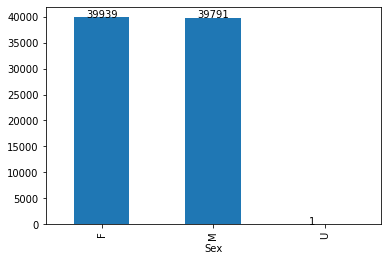

In [18]:
ax_sex = df.groupby('Sex').sum().plot.bar(y = 'Number_of_confirmed_cases', legend = False)
for p in ax_sex.patches:
    ax_sex.annotate(str(p.get_height()), xy=(p.get_x()+0.11, p.get_height()))

### Age_Group <a name="paragraph6-2"></a>

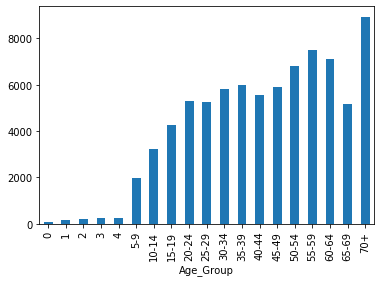

In [19]:
df_age = df.groupby('Age_Group')['Number_of_confirmed_cases'].sum()
df_age = df_age.reindex(index = ['0', '1', '2', '3', '4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
                                '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70+'])
df_age.plot.bar()

### Serotype <a name="paragraph6-3"></a>

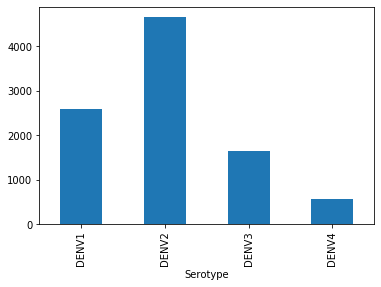

In [20]:
df.groupby('Serotype').sum().plot.bar(y = 'Number_of_confirmed_cases', legend = False)

### Location <a name="paragraph6-4"></a>

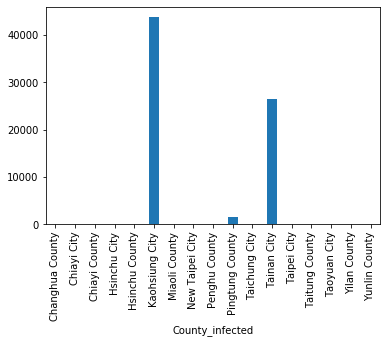

In [21]:
df.groupby('County_infected').sum().plot.bar(y = 'Number_of_confirmed_cases', legend = False)

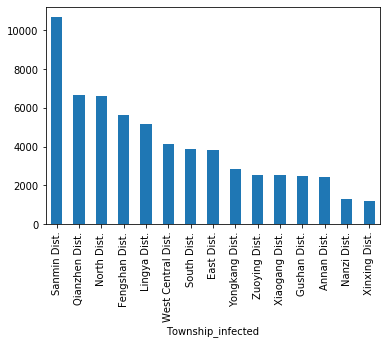

In [22]:
ax_town = df.groupby('Township_infected')['Number_of_confirmed_cases'].sum().sort_values(ascending = False)
ax_town.iloc[0:15].plot.bar()

## Date <a name="paragraph7"></a>

Also, we can see the occurance by date.

### Occurance by year <a name="paragraph7-1"></a>

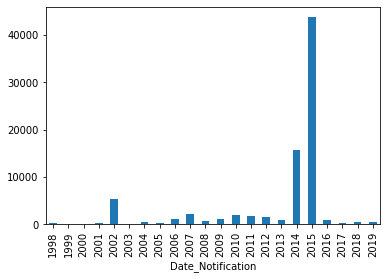

In [23]:
ax_year = df.groupby(df['Date_Notification'].dt.year)['Number_of_confirmed_cases'].sum()
ax_year
ax_year.plot.bar()

### Occurance by month <a name="paragraph7-2"></a>

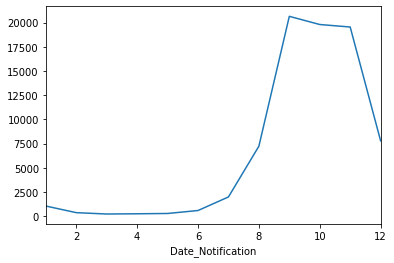

In [24]:
ax_month = df.groupby(df['Date_Notification'].dt.month)['Number_of_confirmed_cases'].sum()
ax_month.plot()

### Occurance by week <a name="paragraph7-3"></a>

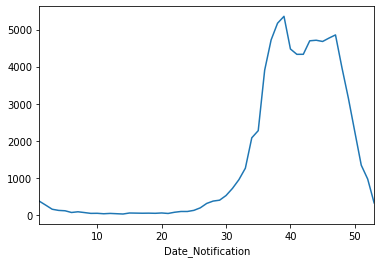

In [25]:
ax_weekofyear = df.groupby(df['Date_Notification'].dt.weekofyear)['Number_of_confirmed_cases'].sum()
ax_weekofyear.plot()

### Standardized occurance by month <a name="paragraph7-4"></a>

In [26]:
pt = df[["Date_Notification","Number_of_confirmed_cases"]]
#fill_value: 0 if nan.
pt = pd.pivot_table(pt, index=pt['Date_Notification'].dt.month, columns=pt['Date_Notification'].dt.year, aggfunc='sum', fill_value=0)
pt.columns = pt.columns.droplevel() #remove double headder
pt.head()

Date_Notification,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Date_Notification,,,,,,,,,,,,,,,,,,,,,
1,3,23,4,1,9,60,6,11,4,33,...,50,23,41,36,29,118,475,25,5,37
2,8,16,1,1,5,15,9,10,4,6,...,23,19,14,21,19,34,52,25,14,38
3,7,2,3,4,1,3,5,2,8,4,...,16,2,10,20,16,33,20,15,7,26
4,9,5,0,0,9,1,6,5,4,10,...,14,4,20,15,16,21,22,11,14,27
5,4,1,1,3,5,1,6,6,6,7,...,12,6,28,25,18,33,22,11,23,36


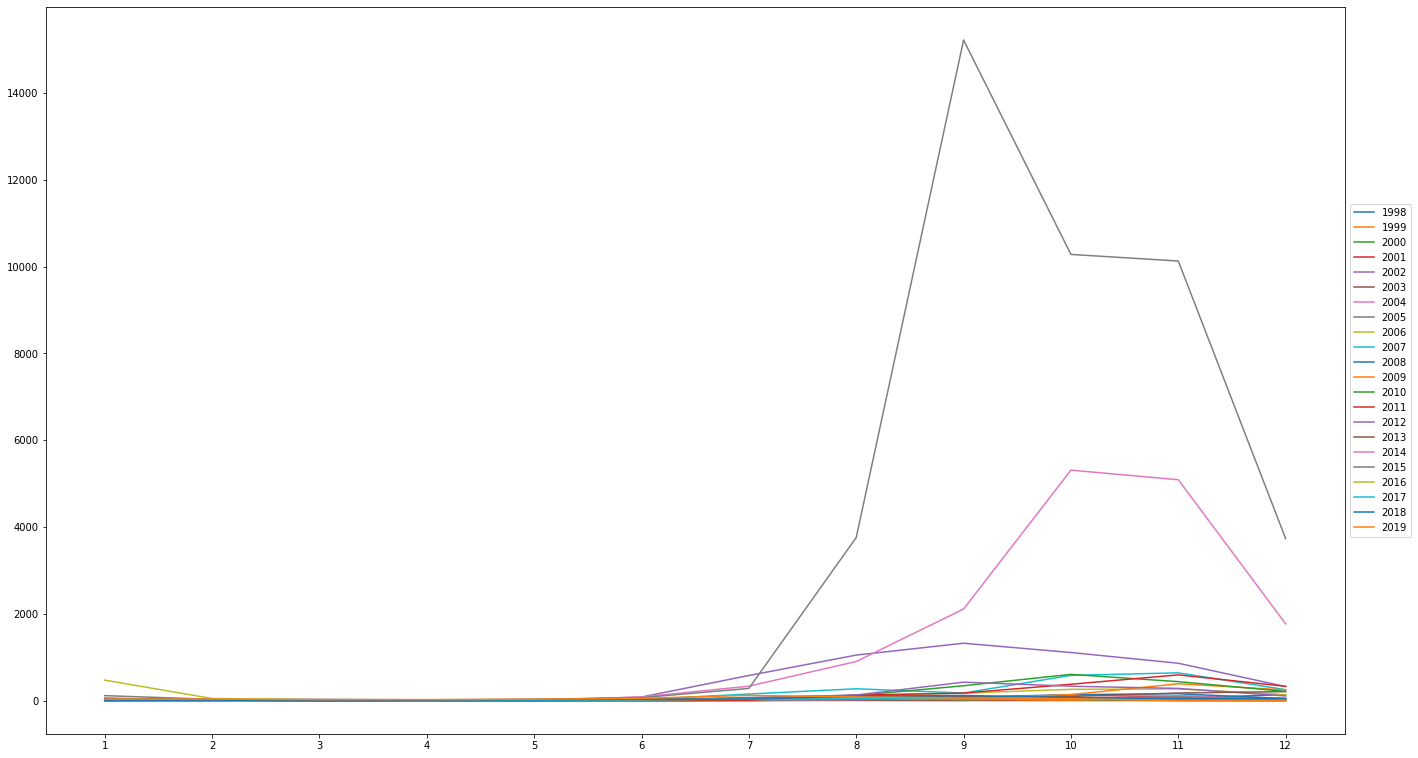

In [27]:
ax = plt.figure().add_subplot(111)
ax.plot(pt)

ax.set_xticks(np.arange(1,13))

ax.legend(pt.columns.tolist(), loc='center left', bbox_to_anchor=(1, .5)) #add the column names as legend.
plt.tight_layout(rect=[0, 0, 3.3, 3])
plt.show()

In [28]:
norm_df=(pt-pt.mean())/pt.std()
norm_df.head()
norm_mean = norm_df.mean(axis = 1)
norm_std = norm_df.std(axis = 1)

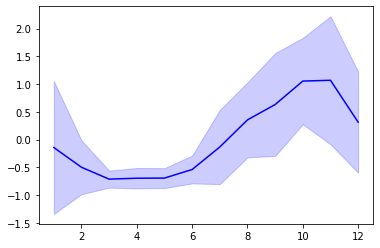

In [29]:
plt.plot(norm_df.index, norm_mean, 'b')
plt.fill_between(norm_std.index, norm_mean-norm_std, norm_mean+norm_std, color='b', alpha=0.2)

## Linking Temperature <a name="paragraph8"></a>

### Get dataset <a name="paragraph8-1"></a>

In [30]:
temp = pd.read_excel('temp.xlsx', sheet_name='complete')
temp.head()

,Date,Taipei City,Hsinchu City,Taichung City,Kaohsiung City,Hualien County
0,1998-01-01,16.1,15.4,17.6,20.5,18.6
1,1998-02-01,16.6,16.0,17.8,20.9,18.7
2,1998-03-01,19.0,18.2,20.7,23.4,20.9
3,1998-04-01,24.2,23.8,25.2,26.3,24.2
4,1998-05-01,25.9,26.2,27.0,28.0,26.0


In [31]:
temp.dtypes

Date              datetime64[ns]
Taipei City              float64
Hsinchu City             float64
Taichung City            float64
Kaohsiung City           float64
Hualien County           float64
dtype: object

In [32]:
temp.isna().sum()

Date              0
Taipei City       0
Hsinchu City      0
Taichung City     0
Kaohsiung City    0
Hualien County    0
dtype: int64

### Calculate correlation <a name="paragraph8-2"></a>

#### Try for Kaoshiung

In [33]:
temp_kao = temp[["Date","Kaohsiung City"]]
temp_kao = pd.pivot_table(temp_kao, index=temp_kao['Date'].dt.month, columns=temp_kao['Date'].dt.year, aggfunc='sum', fill_value=0)
temp_kao.columns = temp_kao.columns.droplevel() #remove double headder
temp_kao.head()

Date,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Date,,,,,,,,,,,,,,,,,,,,,
1,20.5,20.1,19.5,20.2,19.9,19.2,19.1,18.6,20.4,19.7,...,19.9,17.5,19.3,19.7,19.5,19.9,19.3,21.7,20.4,21.9
2,20.9,20.9,19.6,21.0,20.8,21.4,20.0,20.5,21.5,22.1,...,21.5,20.1,20.1,22.3,20.3,20.8,19.6,21.1,19.8,23.8
3,23.4,24.6,22.6,23.3,24.0,22.7,22.5,20.5,22.7,23.5,...,23.7,21.4,23.6,23.9,22.6,23.6,21.6,23.5,23.5,24.1
4,26.3,26.0,25.7,25.6,26.8,26.1,25.8,26.0,26.3,25.0,...,24.9,24.6,26.6,25.1,25.9,26.2,26.9,25.6,26.3,26.9
5,28.0,26.5,27.4,27.5,27.6,28.0,28.7,28.3,28.2,27.7,...,27.8,27.2,28.0,27.6,27.8,28.3,28.9,28.2,29.1,27.5


For each year, what determines the occurance?
Does winter temperature determine? Or does the temperature in August determine?

In [34]:
year_occurance = pt.sum(axis=0)
year_occurance
temp_kao.corrwith(year_occurance, axis = 1)

Date
1    -0.011049
2    -0.037097
3     0.105316
4     0.100771
5     0.131959
6     0.571483
7     0.162203
8    -0.021660
9     0.178174
10    0.095694
11    0.135623
12    0.116909
dtype: float64

#### Expand for all of the cities

In [35]:
columns = iter(list(temp))
next(columns)
tempPivot = {}
for i in columns:
    city = i.split()[0]
    tempPivot[city] = temp[["Date", i]]
    tempPivot[city] = pd.pivot_table(tempPivot[city], index=tempPivot[city]['Date'].dt.month, columns=tempPivot[city]['Date'].dt.year, aggfunc='sum', fill_value=0)
    tempPivot[city].columns = tempPivot[city].columns.droplevel() #remove double headder


In [36]:
tempPivot

{'Taipei': Date  1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  ...  2010  \
 Date                                                              ...         
 1     16.1  17.1  17.0  17.5  16.1  16.2  15.4  15.5  17.7  17.3  ...  16.9   
 2     16.6  16.7  16.0  18.1  17.8  17.6  17.8  16.2  17.8  18.7  ...  17.6   
 3     19.0  19.5  18.4  19.1  21.1  18.2  17.6  17.3  18.7  19.7  ...  20.0   
 4     24.2  22.3  21.2  21.9  23.8  23.6  21.9  23.0  23.1  21.2  ...  20.7   
 5     25.9  23.9  25.3  25.4  26.6  25.1  25.8  26.2  25.5  26.4  ...  25.5   
 6     28.0  27.8  27.9  28.5  28.6  27.4  27.2  28.2  28.0  28.0  ...  26.2   
 7     30.2  29.1  29.6  29.5  29.6  30.8  29.7  29.8  30.3  30.4  ...  30.3   
 8     29.6  28.4  28.4  30.1  30.1  30.1  29.4  29.3  29.9  28.7  ...  30.0   
 9     26.7  27.9  27.9  26.5  27.1  28.4  27.3  28.8  27.0  27.5  ...  28.8   
 10    24.8  25.1  25.7  24.2  25.1  24.4  23.0  25.0  25.6  24.8  ...  24.4   
 11    22.3  21.1  22.1  20.5 

### Generate heat map <a name="paragraph8-3"></a>

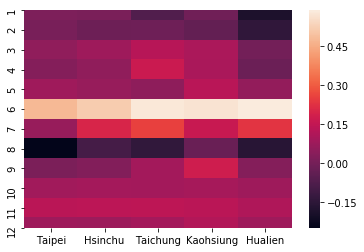

In [37]:
corr_temp = pd.DataFrame(index=list(range(1,13)))

for i in tempPivot:
    corr_temp[i] = tempPivot[str(i)].corrwith(year_occurance, axis = 1)
corr_temp
sns.heatmap(corr_temp)

## Linking Percipitation <a name="paragraph9"></a>

In [38]:
rain = pd.read_excel('rain.xlsx')
rain.head()

,Date,Taipei,Hsinchu,Taichung,Kaohsiung,Hualien
0,2010-01-01,105.3,85.3,34.1,1.5,71.3
1,2010-02-01,232.6,225.5,118.3,10.5,81.4
2,2010-03-01,66.5,84.0,22.6,1.0,36.1
3,2010-04-01,112.5,168.5,158.4,48.0,59.0
4,2010-05-01,183.9,224.0,145.3,188.0,94.8


In [39]:
columns = iter(list(rain))
next(columns)
rainPivot = {}
for i in columns:
    city = i.split()[0]
    rainPivot[city] = rain[["Date", i]]
    rainPivot[city] = pd.pivot_table(rainPivot[city], index=rainPivot[city]['Date'].dt.month, columns=rainPivot[city]['Date'].dt.year, aggfunc='sum', fill_value=0)
    rainPivot[city].columns = rainPivot[city].columns.droplevel()


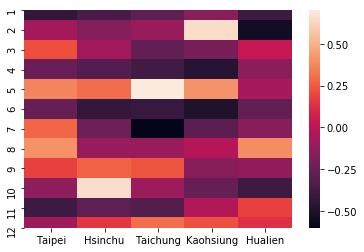

In [40]:
corr_rain = pd.DataFrame(index=list(range(1,13)))

for i in rainPivot:
    corr_rain[i] = rainPivot[str(i)].corrwith(year_occurance, axis = 1)
corr_rain
sns.heatmap(corr_rain)

## Let's look at the map <a name="paragraph10"></a>

### Original map <a name="paragraph10-1"></a>

In [41]:
Taiwan_map = folium.Map(location = [23.5, 121], zoom_start = 7)
Taiwan_map

### Plot 1000 incidents from township_living <a name="paragraph10-2"></a>

In [42]:
limit = 1000
df_loc = df.iloc[0:limit, :]
df_loc

,Date_Onset,Date_Confirmation,Date_Notification,Sex,Age_Group,County_living,Township_living,Village_Living,Enumeration_unit_long,Enumeration_unit_lat,County_infected,Township_infected,Village_infected,Imported,Country_infected,Number_of_confirmed_cases,Serotype
0,1998-01-02,NaT,1998-01-07,M,40-44,Pingtung County,Pingtung City,NaN,120.505899,22.464207,NaN,NaN,NaN,N,NaN,1,NaN
1,1998-01-03,NaT,1998-01-14,M,30-34,Pingtung County,Donggang Township,NaN,120.453657,22.466339,NaN,NaN,NaN,Y,NaN,1,DENV2
2,1998-01-13,NaT,1998-02-18,M,55-59,Yilan County,Yilan City,NaN,121.751434,24.749215,NaN,NaN,NaN,Y,NaN,1,NaN
3,1998-01-15,NaT,1998-01-23,M,35-39,Kaohsiung City,Lingya Dist.,NaN,120.338159,22.630317,NaN,NaN,NaN,N,NaN,1,NaN
4,1998-01-20,NaT,1998-02-04,M,55-59,Yilan County,Wujie Township,NaN,121.798235,24.684508,NaN,NaN,NaN,N,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2002-06-30,NaT,2002-07-02,F,35-39,Kaohsiung City,Qianzhen Dist.,NaN,120.331770,22.603207,Kaohsiung City,Qianzhen Dist.,NaN,N,TAIWAN,1,NaN
996,2002-06-30,NaT,2002-07-03,F,20-24,Kaohsiung City,Qianzhen Dist.,NaN,120.331424,22.611746,Kaohsiung City,Qianzhen Dist.,NaN,N,TAIWAN,1,DENV2
997,2002-06-30,NaT,2002-07-03,M,35-39,Kaohsiung City,Qianzhen Dist.,NaN,120.328948,22.602688,Kaohsiung City,Qianzhen Dist.,NaN,N,TAIWAN,1,DENV2
998,2002-06-30,NaT,2002-07-02,F,40-44,Kaohsiung City,Fengshan Dist.,NaN,120.357085,22.622456,NaN,NaN,NaN,N,TAIWAN,1,DENV2


In [43]:
from folium import plugins

Taiwan_map = folium.Map(location = [23.5, 121], zoom_start = 7)

incidents = plugins.MarkerCluster().add_to(Taiwan_map)

for lat, lng, in zip(df_loc.Enumeration_unit_lat, df_loc.Enumeration_unit_long):
    if lat > 0:
        folium.CircleMarker(
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.6,
            location=[lat, lng],
            icon=None,
        ).add_to(incidents)

Taiwan_map

### Plot all incidents form township_infected <a name="paragraph10-3"></a>

But what if we want to know the location of infection?  We have the township name, but we don't have the latitude and longitude yet.  I decided to fill the blanks by matching with the latitude and longitude of township_living.

The first step is to sum all the incidencts by township_infected

In [44]:
ax_town = df.groupby('Township_infected')['Number_of_confirmed_cases'].sum().sort_values(ascending = False)
ax_town = ax_town.to_frame(name = 'sum')
ax_town

,sum
Township_infected,
Sanmin Dist.,10689
Qianzhen Dist.,6690
North Dist.,6592
Fengshan Dist.,5626
Lingya Dist.,5160
...,...
Tucheng Dist.,1
Hukou Township,1
Wutai Township,1


Then I check if the township_infected is found in township_living.  If so, then I will be able to get the latitude and longitude.  It appears like almost all of the township can be matched.

In [45]:
ax_town.index.isin(df.Township_living).astype(int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

The for loop will now fill the blanks of ax_town.  Note that it is not the best solution to use a for loop, because it is pretty slow and should normally be avoided when pandas is available.  However, I still use it because of my lack of understanding of pandas :(

In [49]:
for i in ax_town.index:
    try:
        temp_df = df.loc[df['Township_living'] == i].iloc[0]
        lat = temp_df.Enumeration_unit_lat
        long = temp_df.Enumeration_unit_long
        ax_town.loc[i, "lat"] = temp_df.Enumeration_unit_lat
        ax_town.loc[i, "long"] = temp_df.Enumeration_unit_long
    except: pass
ax_town

,sum,lat,long
Township_infected,,,
Sanmin Dist.,10689,22.638670,120.319017
Qianzhen Dist.,6690,22.586564,120.318716
North Dist.,6592,24.157778,120.678292
Fengshan Dist.,5626,22.607027,120.340012
Lingya Dist.,5160,22.630317,120.338159
...,...,...,...
Tucheng Dist.,1,24.984448,121.451963
Hukou Township,1,24.877445,121.055902
Wutai Township,1,22.746627,120.731682


We can plot the location based on different categories.

In [48]:
Taiwan_map = folium.Map(location = [23.5, 121], zoom_start = 7)
colordict = {0: 'lightgreen', 1: 'lightblue', 2: 'yellow', 3:'orange', 4: 'red'}

for lat, long, num, town in zip(ax_town['lat'], ax_town['long'], ax_town['sum'], ax_town.index):
    if lat > 0:
        folium.CircleMarker(
            [lat, long],
            radius= 5,
            color='grey',
            key_on = num,
            threshold_scale=[0, 1, 2, 3, 4],
            fill_color=colordict[int(math.log10(num))],
            fill=True,
            fill_opacity=1
            ).add_to(Taiwan_map)
Taiwan_map